In [97]:
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# the code below sets the text to LaTEX font
plt.rcParams['text.usetex'] = True
# the code below sets the default figure and text size for all plots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14


In [98]:
# open the .csv file - the "header=0" part sets the first row as header of the dataframe
df = pd.read_csv('book_list.csv', header=0)
for i in df.columns:
  print("column name: ", i)
# now, I don't want to show the last column, i.e. Unnamed:10 --> I will delete it
df = df.drop(df.columns[-1], axis=1)

column name:  title
column name:  # pages
column name:  year of publication
column name:  author
column name:  publisher
column name:  year of birth
column name:  year of death
column name:  nationality
column name:  sex
column name:  language
column name:  Unnamed: 10


In [99]:
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex,language
0,la valle oscura,309,2020,anna wiener,adelphi,1987,/,USA,f,italiano
1,gioco all'alba,152,1961,arthur schnitzler,adelphi,1862,1931,AUSTRIA,m,italiano
2,il ritorno di casanova,149,1900,arthur schnitzler,adelphi,1862,1931,AUSTRIA,m,italiano
3,helgoland,227,2020,carlo rovelli,adelphi,1956,/,ITALY,m,italiano
4,"godel, escher, bach",852,1979,douglas r. hofstadter,adelphi,1977,/,USA,m,italiano
...,...,...,...,...,...,...,...,...,...,...
452,sociologia della religione - induismo e buddhismo,327,1916,max weber,newton compton,1864,1920,GERMANY,m,italiano
453,storia d'europa dalle invasioni al XVI secolo,441,1936,hernri pirenne,newton compton,1862,1935,BELGIUM,m,italiano
454,the longest journey,327,1907,edward morgan forster,new directions,1879,1970,ENGLISH,m,english
455,macbeth,190,1606,william shakespeare,Thomson Learning,/,1616,ENGLAND,m,english


In [100]:
# morevoer, I want the row index to start from 1 and not from 0
df = df.reset_index(drop=True)
df.index += 1
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex,language
1,la valle oscura,309,2020,anna wiener,adelphi,1987,/,USA,f,italiano
2,gioco all'alba,152,1961,arthur schnitzler,adelphi,1862,1931,AUSTRIA,m,italiano
3,il ritorno di casanova,149,1900,arthur schnitzler,adelphi,1862,1931,AUSTRIA,m,italiano
4,helgoland,227,2020,carlo rovelli,adelphi,1956,/,ITALY,m,italiano
5,"godel, escher, bach",852,1979,douglas r. hofstadter,adelphi,1977,/,USA,m,italiano
...,...,...,...,...,...,...,...,...,...,...
453,sociologia della religione - induismo e buddhismo,327,1916,max weber,newton compton,1864,1920,GERMANY,m,italiano
454,storia d'europa dalle invasioni al XVI secolo,441,1936,hernri pirenne,newton compton,1862,1935,BELGIUM,m,italiano
455,the longest journey,327,1907,edward morgan forster,new directions,1879,1970,ENGLISH,m,english
456,macbeth,190,1606,william shakespeare,Thomson Learning,/,1616,ENGLAND,m,english


In [101]:
#now I want to extract some information about the number of pages of these books
num_pag = df['# pages'] # I create an array from the column of the panda dataframe df['# pages']
mean_page = num_pag.mean()
median_page = num_pag.median()
quartiles_page = num_pag.quantile([0.25,0.75])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


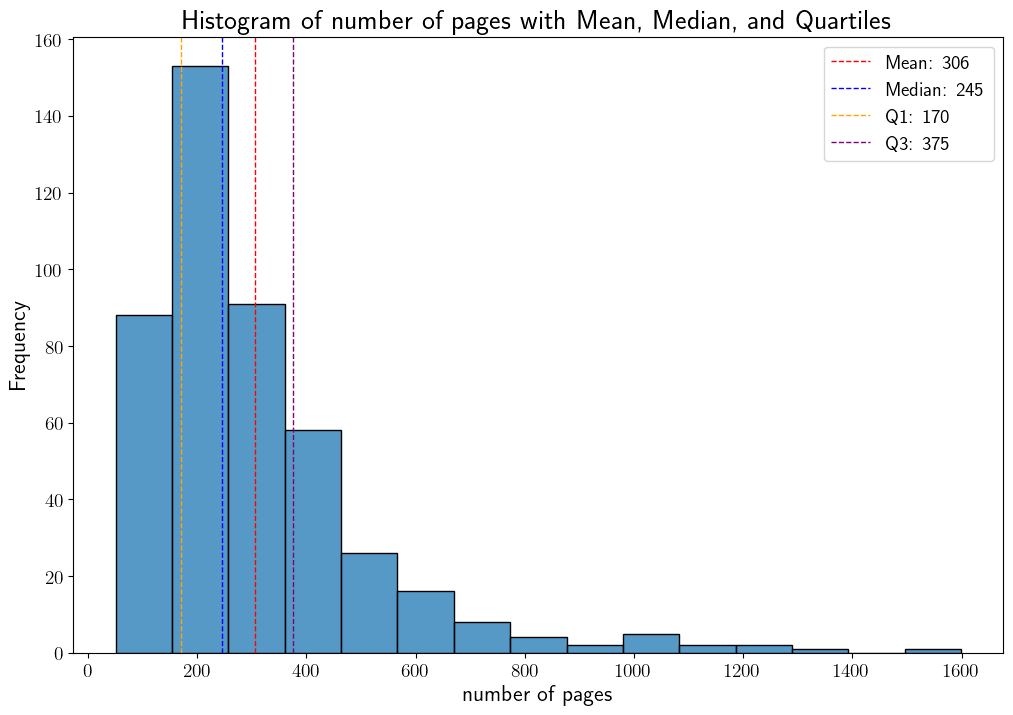

In [123]:
# Plot a histogram of column '# pages'
sns.histplot(df['# pages'], bins=15, kde=False)

# Add lines for mean, median, and quartiles
plt.axvline(mean_page, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_page:.0f}')
plt.axvline(median_page, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_page:.0f}')
plt.axvline(quartiles_page[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_page[0.25]:.0f}')
plt.axvline(quartiles_page[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_page[0.75]:.0f}')

# add titles
plt.title('Histogram of number of pages with Mean, Median, and Quartiles')
# add labels
plt.xlabel('number of pages')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/first_hist.png')
plt.show()

In [103]:
# now I want to obtain the same information for the year of publication of these books - at the best of my ability ot retrieve
# the information about the publication year
df['year of publication'] = df['year of publication'].replace(['/', 'V.Y.'], np.nan)
publ_year = df['year of publication']

df['year of publication'] = pd.to_numeric(df['year of publication'], errors='coerce')
publ_year = df['year of publication']

mean_pub_year = publ_year.mean()
median_pub_year = publ_year.median()
quartiles_pub_year = publ_year.quantile([0.25,0.75])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


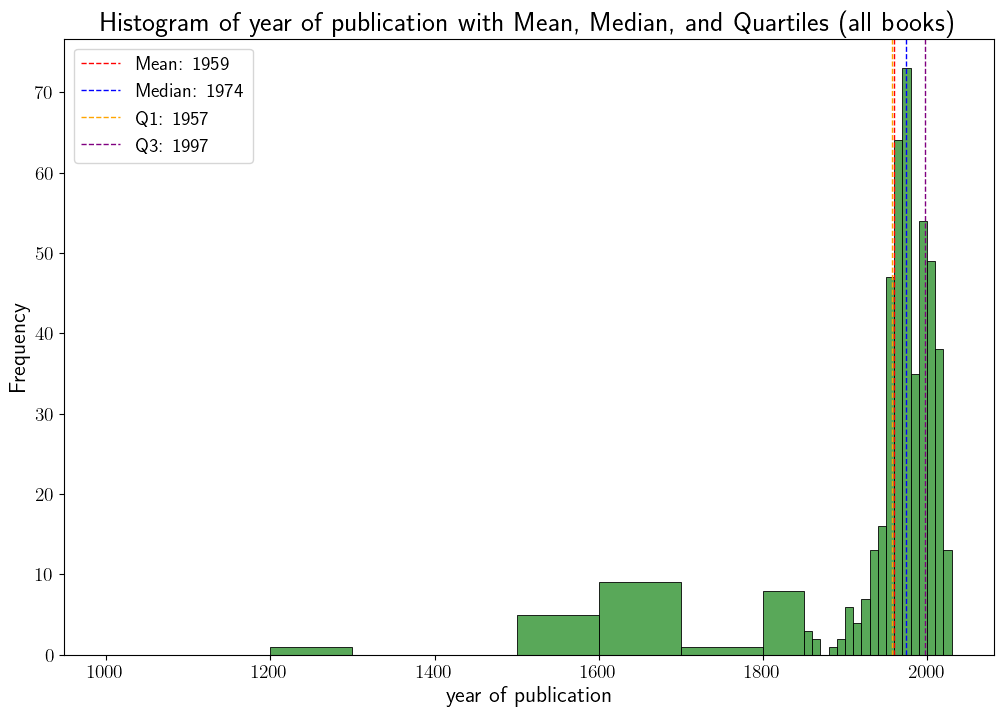

In [124]:
# Plot a histogram of column 'year of publication'
bins_publ_year = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1850,1860,1870,
                  1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,
                  2000,2010,2020,2030]

sns.histplot(publ_year, bins=bins_publ_year, kde=False, color='forestgreen')

# Add lines for mean, median, and quartiles
plt.axvline(mean_pub_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_pub_year[0.75]:.0f}')

# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (all books)')
# add labels
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/second_hist.png')
plt.show()

this is not a very pleasant histogram. let's try to obtain a plot only with the books published starting from 1900.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


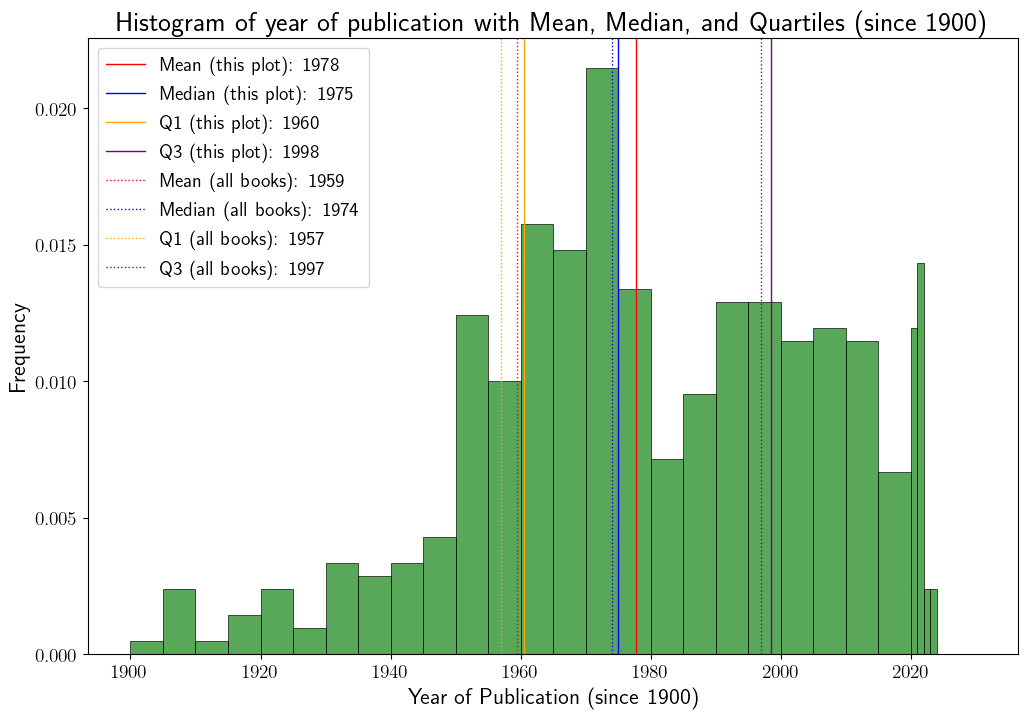

In [125]:
#####
# filter data for 20th century
publ_year_20th = publ_year[publ_year >= 1900]

bins_publ_year_20th = [1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,
                       1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2021,2022,2023,2024,2025,2030]
# plot histogram for the 20th century with density normalization
sns.histplot(publ_year_20th, bins=bins_publ_year_20th, stat='density', kde=False, color='forestgreen')

mean_pub_year_20th = publ_year_20th.mean()
median_pub_year_20th = publ_year_20th.median()
quartiles_pub_year_20th = publ_year_20th.quantile([0.25,0.75])

# add lines for mean, median, and quartiles only for books published after 1899
plt.axvline(mean_pub_year_20th, color='red', linestyle='solid', linewidth=1, label=f'Mean (this plot): {mean_pub_year_20th:.0f}')
plt.axvline(median_pub_year_20th, color='blue', linestyle='solid', linewidth=1, label=f'Median (this plot): {median_pub_year_20th:.0f}')
plt.axvline(quartiles_pub_year_20th[0.25], color='orange', linestyle='solid', linewidth=1, label=f'Q1 (this plot): {quartiles_pub_year_20th[0.25]:.0f}')
plt.axvline(quartiles_pub_year_20th[0.75], color='purple', linestyle='solid', linewidth=1, label=f'Q3 (this plot): {quartiles_pub_year_20th[0.75]:.0f}')

# add lines for mean, median, and quartiles for every book
plt.axvline(mean_pub_year, color='red', linestyle='dotted', linewidth=1, label=f'Mean (all books): {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dotted', linewidth=1, label=f'Median (all books): {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dotted', linewidth=1, label=f'Q1 (all books): {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dotted', linewidth=1, label=f'Q3 (all books): {quartiles_pub_year[0.75]:.0f}')


# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (since 1900)')
# add labels
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/third_hist.png')

plt.show()

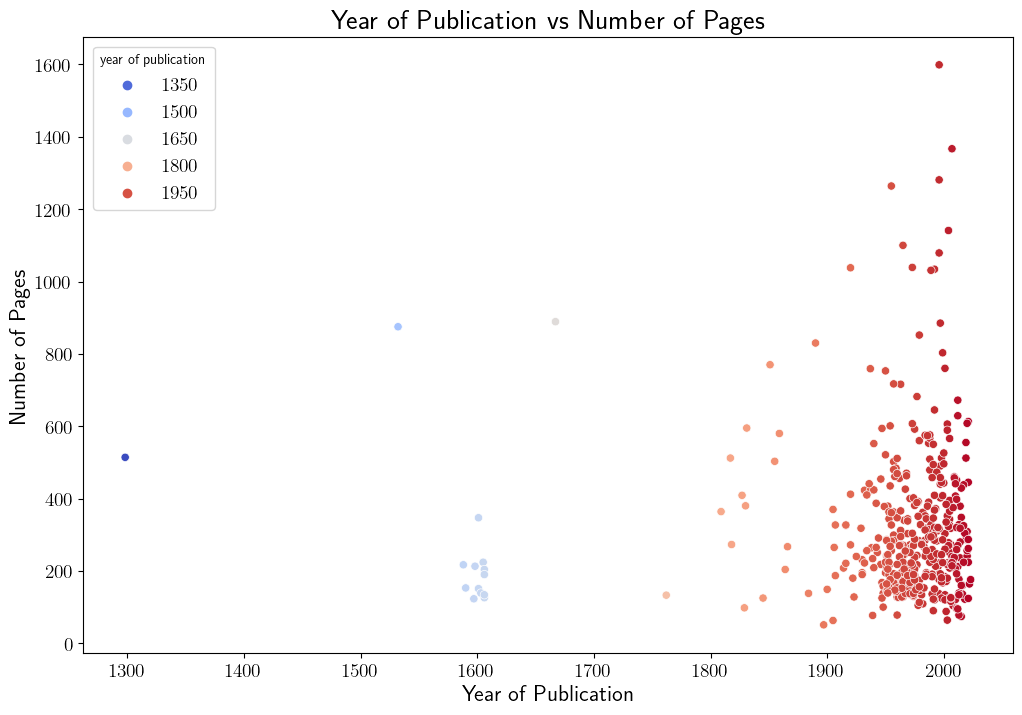

In [126]:
books_data_df = df[['# pages', 'year of publication']]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm')

# Add labels and a title
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')
plt.title('Year of Publication vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/first_plot.png')
plt.show()

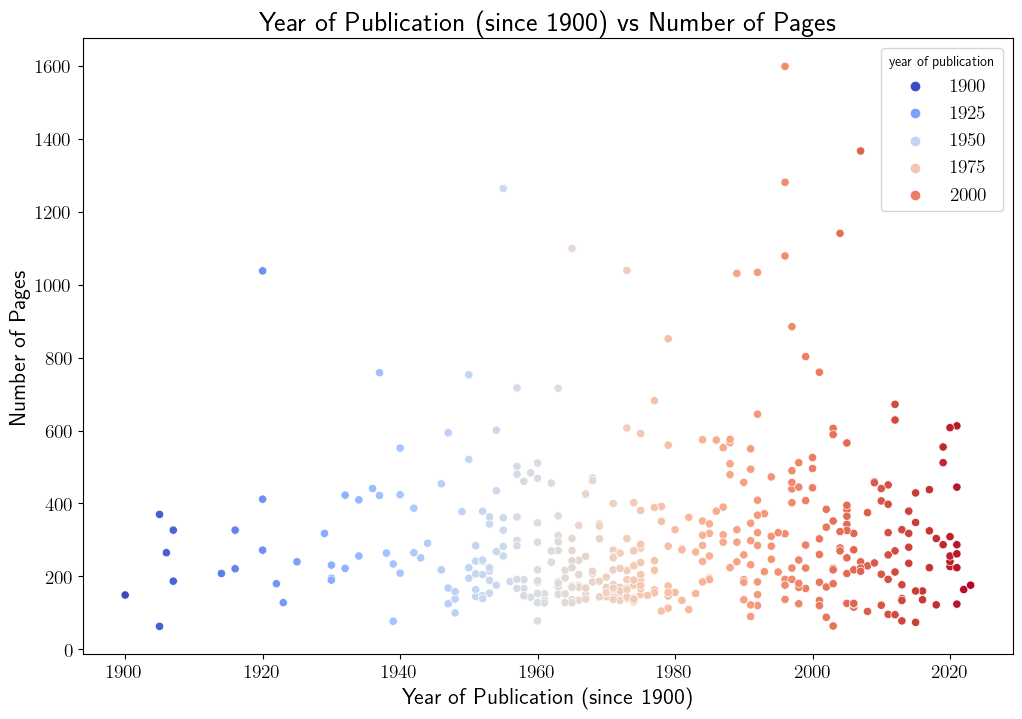

In [127]:
books_data_df_20th = df[df['year of publication'] > 1899]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df_20th, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm')

# Add labels and a title
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Number of Pages')
plt.title('Year of Publication (since 1900) vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/second_plot.png')
plt.show()

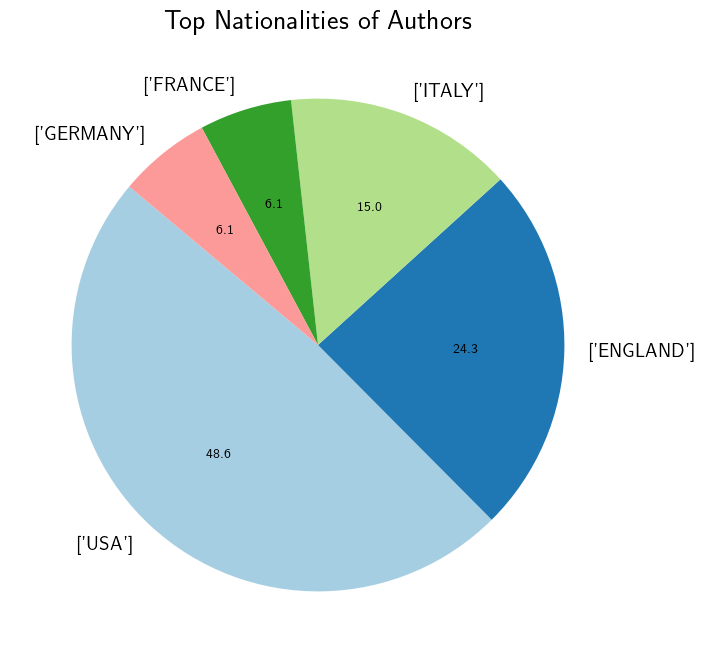

In [160]:
# Expand the DataFrame to have one nationality per row
# Split the 'nationalities' column by comma and explode into separate rows
df_expanded = df.assign(nationalities=df['nationality'].str.split(' - ')).explode('nationality')

# Remove any extra spaces and convert to lower case for consistency
df_expanded['nationality'] = df_expanded['nationality'].str.strip().str.lower()

# Count occurrences and filter top nationalities
nationality_counts = df_expanded['nationalities'].value_counts()
top_nationalities = nationality_counts.head(5)  # Change 5 to the number of top nationalities you want to display

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_nationalities, 
        labels=top_nationalities.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired(range(len(top_nationalities))))
plt.title('Top Nationalities of Authors')
plt.show()

In [ ]:
books_three_data_df = df[['# pages', 'year of publication', 'nationality']]
books_three_data_df

sns.scatterplot(data=books_three_data_df, x='year of publication', y='# pages', hue='nationality', palette='Set2', size='number_of_pages', sizes=(50, 500), legend='brief')
